# 2.8.1 NumPy中的快速排序：np.sort和np.argsort

In [1]:
import numpy as np

x = np.array([2, 1, 4, 3, 5])
np.sort(x) # 不修改元素组

array([1, 2, 3, 4, 5])

In [2]:
x

array([2, 1, 4, 3, 5])

In [3]:
x.sort() # 修改原数组
x

array([1, 2, 3, 4, 5])

In [4]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x) # 返回排序好的原数组的索引值
i

array([1, 0, 3, 2, 4])

In [5]:
x[i]

array([1, 2, 3, 4, 5])

**沿着行或列排序**

In [6]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [7]:
np.sort(X, axis=0) # 对每一列排序

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [8]:
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

# 2.8.2 部分排序：分隔

np.partition函数的输入是数组和数字K，输出的结果是一个新数组，最左边是第K小的值。

In [9]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [10]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

# 2.8.3 示例：K个最近邻

In [11]:
X = rand.rand(10, 2)

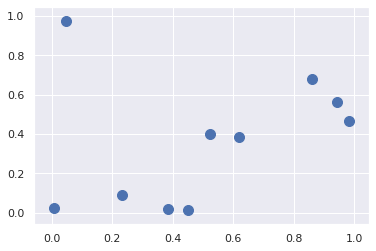

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
plt.scatter(X[:, 0], X[:, 1], s=100)

In [13]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1) # 这行拆解开来，如下所示

In [14]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [15]:
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [16]:
dist_sq = sq_differences.sum(-1)
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
nearest = np.argsort(dist_sq, axis=1)
nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]])

In [18]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis = 1)

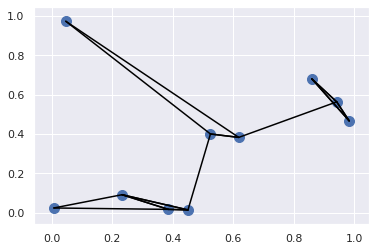

In [19]:
plt.scatter(X[:, 0], X[:, 1], s=100)
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')